<a href="https://colab.research.google.com/github/Dinarque/INALCO_Inalco_M2_langage_de_scripts_2024_eleves/blob/main/TP/TP2_la_chasse_au_papyrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TP2 : La chasse au papyrus

  Internet regorge de bases de données intéressantes, surtout pour les linguistes et les humanités numériques. En effet, ils mettent souvent en ligne des bases de données spécialisées permettant (gratuitement ou non) d'explorer une collection particulière. Si la base de donnée est hébergée sur le site et naviguable, on ne peut malheureusement pas en faire une exploration quantitative puisque les sites n'offrent pas l'option de télécharger l'ensemble des données. De plus on est pas forcément intéressé par toute la collection ni par toutes les métadonnées disponibles pour chaque document.


Heureusement, python est là pour nous aider !

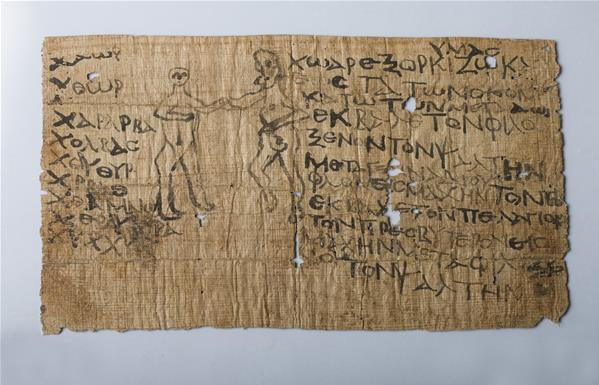

Image issue de https://antiquities.bibalex.org/Collection/Detail.aspx?lang=fr&a=508

L'objectif de ce TP est de collecter, stocker et analyser une collection de papyri grecs. Ce sera l'occasion de voir comment on peut utiliser les librairies de data science actuelles pour observer et analyser un dataset original

**Objectifs :**

1) Résiver les techniques de web scraping pour voir comment collecter un dataset:
* déduire la structure des url à regarder
* télécharger les pages HTML
* regarder la structure de la page et utiliser un parser HTML pour extraire les données

2) stocker les données sous un format csv. Utiliser pandas pour les analyser

3) construire des visualisations intéressantes du dataset

4) gérer le texte grec, son encodage, les outils TAL pour le traiter

5) utiliser streamlit, une librairie intuitive pour créer un front permettant d'explorer la collection de papyri.

**NB : LE TP EST A REALISER DANS DES FICHIERS PY ISOLES ET PAS SUR LE NOTEBOOK **

Le rendu prendra la forme d'une archive contenant 3 fichiers .py ainsi qu'un fichier requirements.txt

# I) Web scraping et collecte de la base de données des papyrus. /6

L'objectif de ce TP est d'analyser une collection de papyri grecs particulière.

Nous nous intéresserons à une partie de la collection préservée sur le site trismegistos.

https://www.trismegistos.org/

Nous ne nous intéresserong qu'à un nombre limité de papyri dont la liste est fournie en annexe (fichier papyrus_metadata.csv)



# 1)Collecte des URL

 A partir de la liste des papyri à étudier, générez la liste des url à crawler. Pour cela parcourez le site pour comprendre la structure des url donnant accès à un papyrus.

# 2) Scraping d'une page


Etudiez la structure du HTML des pages présentant un papyrus

https://www.trismegistos.org/text/100

écrire une fonciton scrap_papyrus() prenant en entrée une url et retourne un dictionnaire contenant les informations suivantes sur le papyrus:
* Date
* Provenance
* Language/script
* Material
* Content
* Publications
* Collections
* Archive
* Le texte principal (à formater)
* La liste des noms de personnes
* La liste des noms de lieux
* La liste des irrégularités textuelles

BONUS : Capturez aussi le  numéro du champ TM Geo
servez vous de ces numéros pour capturer le fichier geo json du lieu, qui se trouve sur les pages des lieux comme par exemple https://www.trismegistos.org/place/2982 .



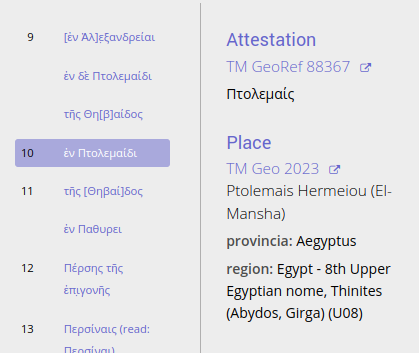

tester ce script sur **une** url au hasard pour vérifier qu'il fonctionne.

# 3) Scraping total

dans un fichier scraping.py écrire un programme qui:
* lit le fichier de papyri à scanner et en déduit la liste d'url à scraper
* scrape chaque url (cf 2) )
* stocke toutes ces informations dans un fichier .csv nommé papyri.csv

**N EXECUTEZ PAS CE CODE CAR IL METTRAIT 20mn A TOURNER ET QUE LE SCRAPING N EST PAS UNE ACTIVITE QUE LES SITES APPRECIENT. JE FOURNIRAI LE CSV POUR PASSER A LA PARTIE II**

à la rigueur, testez votre code sur un ensemble de 3 pages web et pas les 600...


In [ ]:
"""
For these steps, execute `python generate_url.py` and `python scrapper.py`
All parameters have default value. For advance use, see 'python your_script.py -h'
"""

# II) Analyse du dataset /10



Dans cette partie, nous allons utiliser les librairies de datascience pour visualiser, analyser et enrichir le corpus que nous avons scrapé

Pour ne pas pénaliser un scraping imparfait et que je puisse vérifier plus facilement les résultats, vous allez tous télécharger le fichier "papyrus_corpus.csv".

Vous pouvez traitez cette partie du TP soit dans le notebook, soit dans un fichier nommé corpus_analysis.py qui devra s'exécuter correctement de A à Z, affichez les réponses avec un message explicite (print correctement f formatté) et les graphiques demandés (plt.show()) après chaque graphe)

# 4) Chargement et nettoyage du dataset

Il faut d'abord charger ce corpus et le nettoyer un peu:
* Charger le fichier csv dans un DataFrame
* Observer le dataset. Que dire des 4 premières lignes ?  Que faire ? Faites-le.
* Combien de textes n'ont pas été capturés pendant le scraping ? Comment le voit-on ? Enlevez-les
* Combien la collection compte-t elle de papyrus après nettoyage ?
* Trier la collection selon l'ID (ordre croissant)

In [1]:
import pandas as pd

papyrus_file = "../data/papyrus_corpus.csv"
papyrus_dataframe = pd.read_csv(papyrus_file)

In [2]:
# Four first rows
papyrus_dataframe.head(4)

,ID,Authors / works,Book form,Content (beta!),Culture & genre,Date,Full Text,Language/script,Material,Note,People List,Places List,Provenance,Recto/Verso,Reuse note,Reuse type,Ro,Text Irregularities
0,TM 58376,NaN,NaN,funerary (human),NaN,3rd century BC: BC 299 - 200,NaN,Hieroglyphic,stone— stele,NaN,"['Ns-Ḥr', 'Psḏ.t', 'Twtw', 'Subscribe to expor...",{},Panopolis (Akhmim)- Egypt (9th Upper Egyptian ...,NaN,NaN,NaN,NaN,[]
1,TM 61011,"Homerus,Ilias:2.379-2.382This link will bring ...",codex (10 pages); columns per page: 2; highest...,school text?,"literature, science — poetry, epic + philology...",late 4th - early 5th century AD: AD 375 - 425,NaN,Greek(paleography: documentary hand),papyrus,school text (Fournet),['\r\n \t\t\t\t\tWe currently do not ha...,{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro/Vo,NaN,NaN,NaN,[]
2,TM 61596,"Menander,Heros: hypothesis and title (epitomiz...",codex (17 fol.); columns per page: 1; highest ...,NaN,"literature, science — poetry, tragedy + philol...",5th century AD: AD 400 - 499,NaN,Greek(paleography: pointed majuscule sloping),papyrus,reused as a jar stopper,['\r\n \t\t\t\t\tWe currently do not ha...,{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro/Vo,NaN,NaN,NaN,[]
3,TM 61072,"Homerus,Ilias:2.494-2.519This link will bring ...",codex; columns per page: 1; number of lines pe...,school text,"literature — poetry, epic (religion: classical)",late 5th - early 6th century AD: AD 475 - 525,NaN,Greek,NaN,school text (Fournet),['\r\n \t\t\t\t\tWe currently do not ha...,{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro/Vo,NaN,NaN,NaN,[]


In [3]:
# Clean rows without text
papyrus_with_text = papyrus_dataframe[papyrus_dataframe["Full Text"].notna()]
print(f"Original dataset size: {len(papyrus_dataframe)}")
print(f"Number of rows with text: {len(papyrus_with_text)}")

Original dataset size: 579
Number of rows with text: 459


In [4]:
# Sort by id
papyrus_sorted = papyrus_with_text.sort_values("ID", ascending=True)
papyrus_sorted.head()

,ID,Authors / works,Book form,Content (beta!),Culture & genre,Date,Full Text,Language/script,Material,Note,People List,Places List,Provenance,Recto/Verso,Reuse note,Reuse type,Ro,Text Irregularities
200,TM 112497,NaN,NaN,"letter (private) / Brief (privat?), N.N. an N....",NaN,6th century AD: AD 500 - 599,1 [--------------------] [---][.][---] 2 [---...,Greek,NaN,NaN,"[' 2Ἀντίνοος', 'Διόσκορος', ' 3Πανεσνευς', 'Su...","{'[- Σκινε]π̣ωει': '109542', '[- Σκινε]πωει': ...",Lykopolites? - Egypt (13th Upper Egyptian nome...,Ro,NaN,NaN,NaN,[]
422,TM 129806,NaN,NaN,PetitionSee also TM Letters TOP SS6 (1formula).,NaN,year 26 of Iustinianus ?: AD 551 Aug 30 - 552 ...,1 [--------------------] [..........] 2 [..]ο...,Greek,papyrus,NaN,['\r\n \t\t\t\t\tWe currently do not ha...,{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,"Ro, back: blank?",NaN,NaN,NaN,[]
452,TM 15336,NaN,NaN,Petition,NaN,aboutAD 565?,1 [--------------------] [---] 2 τῆς τάξεως ...,Greek,NaN,NaN,"[' 13Νέπωτος', 'Ἀφθονίου', ' 14Νέπως', ' 22Ἀφθ...","{'τῆς Ἀνταιοπολιτῶν̣': '69336', 'ἐν τῇ Ἀντα[ιο...",Antinoopolis (El-Sheikh Ibada)- Egypt (15th Up...,Ro,NaN,NaN,NaN,['ἐξπελλευτοὶ: read ἐξπελλευταὶ']
473,TM 15337,NaN,NaN,Contract: loan,NaN,AD 566 Feb 22?,1 † Κωνσταντῖνος Καλλινίκου σιγγ(ουλάριος) ...,Greek,NaN,NaN,"[' 1Κωνσταντῖνος', 'Καλλινίκου', 'Διοσκόρῳ', '...",{'ἀπὸ Ἀφροδ(ίτης)': '69338'},Antinoopolis (El-Sheikh Ibada)- Egypt (15th Up...,"Ro/Vo, back: continuation",NaN,NaN,NaN,[]
294,TM 15338,NaN,NaN,Contract: loan,NaN,AD 531 May 22?,1 [---] |slanting-stroke| 2 [μετὰ] [τὴν] [ὑ...,Greek,NaN,NaN,"[' 4Αὐρηλίῳ ...', ' 5Αὐρήλιοι ...', '...', 'Ἰω...","{'[ἀπὸ κ]ώμης Ἀφροδίτης': '69341', 'τοῦ Ἀνταιο...",Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro,NaN,NaN,NaN,['προφερομενην: read προφερομένης']


# 5) Etude de corpus : genre, lieu et date


* Quelles sont les différents genre de texte que l'on a collecté ? La nomenclature de la colonne "Content (beta!) est un peu trop précise. Basez-vous sur le premier mot et créez un graphique.
* Affichez cela sous la forme d'un pie chart
* combien de papyri ont-ils été réutilisés ?

* D'où viennent les papyri ?  De même ne retenez que le nom de la ville. Faites un diagramme en barre cette fois.
* Qu'en concluez-vous ?


NB Les graphes devraient ressembler à ça :

In [5]:
# Extract and clean data of `Content column`
content_series = papyrus_sorted["Content (beta!)"]

first_word_regex = r"^([a-zA-Z][a-z]+)"
content_series = content_series.str.extract(first_word_regex)[0]  # [0] is to convert DataFrame to Series
content_series = content_series.apply(lambda x: x.lower())

content_series.head()

200      letter
422    petition
452    petition
473    contract
294    contract
Name: 0, dtype: object

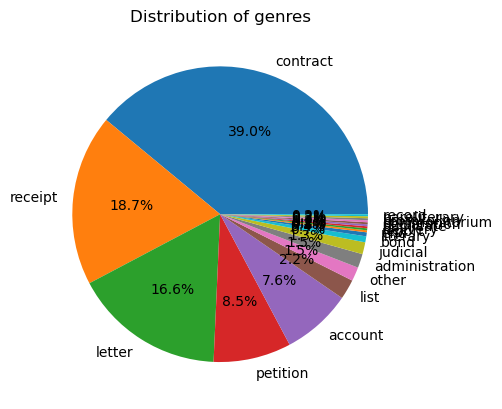

In [6]:
# Pie chart
import matplotlib.pyplot as plt

plt.figure(facecolor="white")

counts = content_series.value_counts()
counts.plot.pie(autopct="%1.1f%%")

plt.ylabel('')
plt.title("Distribution of genres")
plt.show()

In [7]:
# Reused notes
reused_papyrus = papyrus_sorted[papyrus_sorted["Reuse type"].notna()]
print(f"Number of papyri reused: {len(reused_papyrus)}")

Number of papyri reused: 35


In [8]:
# Extract and clean data of `Provenance`
provenance_series = papyrus_sorted["Provenance"]

first_word_regex = r"^([a-zA-Z][a-z]+)"
provenance_series = provenance_series.str.extract(first_word_regex)[0]  # [0] is to convert DataFrame to Series
provenance_series = provenance_series.apply(lambda x: x.lower())

provenance_series.head()

200     lykopolites
422       aphrodito
452    antinoopolis
473    antinoopolis
294       aphrodito
Name: 0, dtype: object

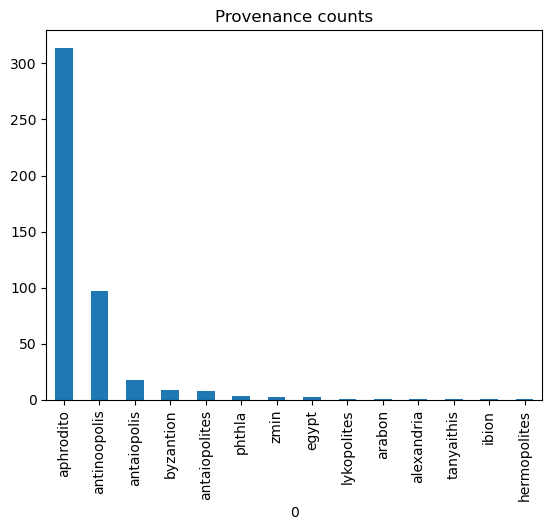

In [9]:
# Pie chart

plt.figure()

counts = provenance_series.value_counts()
counts.plot.bar()

plt.ylabel('')
plt.title("Provenance counts")
plt.show()

## Conclusion
- Maybe Aphrodito city had a better waste disposal system as they bury their books in the same place?

*Identifier la date d'écriture. Observez la catégorie des dates et nettoyez le texte pour regrouper ensemble les catégories pertinente
* Formattez les dates sous le format d'une date simple AD xxx
ou d'un intervalle AD xxx - xxx
* Utilisez ensuite ces valeurs discrètes ou intervalles pour construire un diagramme représentant la densité de papyri sur chaque année du dataset.

* NB quand il y a plusieurs dates mentionnées dans la colonne on ne prendra en compte que la première

* NB : il faudra transformer les bornes en intervalles continus.

In [10]:
# Regularize dates
import re

def normalize_date(date_string):
    date_regex = r"(AD [0-9]+ - [0-9]+)|(AD [0-9]+)"
    match = re.search(date_regex, date_string)
    if match:
        return match.group()
    else:
        return date_string

papyrus_sorted["Date"] = papyrus_sorted["Date"].apply(normalize_date)
papyrus_sorted["Date"].head()

200    AD 500 - 599
422          AD 551
452          AD 565
473          AD 566
294          AD 531
Name: Date, dtype: object

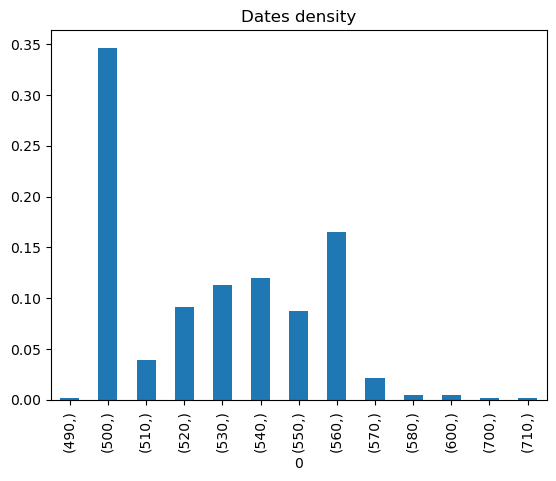

In [11]:
# Date distribution
date_series = papyrus_sorted["Date"]
year_series = date_series.str.extract(r'AD (\d+)').astype(int)
year_series = year_series // 10 * 10

counts = year_series.value_counts().sort_index()
total = sum(counts)
density_series = counts / total

plt.figure()
density_series.plot.bar()
plt.ylabel('')
plt.title("Dates density")
plt.show()

# 6) Nettoyage du texte grec

* écrivez une première fonction de nettoyage du texte qui retire les chiffres arabes, les lignes perdues | gap | ainsi que les caractères spéciaux "†" et "⳨". Appliquez là au texte.
*  Voici la signification de certains codes en papyrologie :
 - Les petits points en dessous de certaines lettres indiquent que la lettre est défformée ou difficilement lisible
 - Les zones entre crochets droits ou parenthèses indiquent que le texte est reconstitué par un auteur, et était illisible / détruit.
 Ecrivez une fonction qui prend en entrée un texte de papyrus nettoyé et renvoie la proportion de lettres incertaines dans le texte. Stockez pour chaque texte cette valeur dans la colonne "Uncertain Portion"
 Combien y a-t de papyrus dont plus du tiers du texte est incertain ?

* Ecrivez une fonction qui enlève les parenthèses et les crochets mais converve leur contenu. Utilisez là sur le texte


In [12]:
weird_characters = r"[\d†⳨]||gap=.+|"

papyrus_sorted["Full Text"] = papyrus_sorted["Full Text"].str.replace(weird_characters, "", regex=True)

In [13]:
papyrus_sorted

,ID,Authors / works,Book form,Content (beta!),Culture & genre,Date,Full Text,Language/script,Material,Note,People List,Places List,Provenance,Recto/Verso,Reuse note,Reuse type,Ro,Text Irregularities
200,TM 112497,NaN,NaN,"letter (private) / Brief (privat?), N.N. an N....",NaN,AD 500 - 599,[--------------------] [---][.][---] [---][...,Greek,NaN,NaN,"[' 2Ἀντίνοος', 'Διόσκορος', ' 3Πανεσνευς', 'Su...","{'[- Σκινε]π̣ωει': '109542', '[- Σκινε]πωει': ...",Lykopolites? - Egypt (13th Upper Egyptian nome...,Ro,NaN,NaN,NaN,[]
422,TM 129806,NaN,NaN,PetitionSee also TM Letters TOP SS6 (1formula).,NaN,AD 551,[--------------------] [..........] [..]ουτ...,Greek,papyrus,NaN,['\r\n \t\t\t\t\tWe currently do not ha...,{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,"Ro, back: blank?",NaN,NaN,NaN,[]
452,TM 15336,NaN,NaN,Petition,NaN,AD 565,[--------------------] [---] τῆς τάξεως τ...,Greek,NaN,NaN,"[' 13Νέπωτος', 'Ἀφθονίου', ' 14Νέπως', ' 22Ἀφθ...","{'τῆς Ἀνταιοπολιτῶν̣': '69336', 'ἐν τῇ Ἀντα[ιο...",Antinoopolis (El-Sheikh Ibada)- Egypt (15th Up...,Ro,NaN,NaN,NaN,['ἐξπελλευτοὶ: read ἐξπελλευταὶ']
473,TM 15337,NaN,NaN,Contract: loan,NaN,AD 566,Κωνσταντῖνος Καλλινίκου σιγγ(ουλάριος) τ...,Greek,NaN,NaN,"[' 1Κωνσταντῖνος', 'Καλλινίκου', 'Διοσκόρῳ', '...",{'ἀπὸ Ἀφροδ(ίτης)': '69338'},Antinoopolis (El-Sheikh Ibada)- Egypt (15th Up...,"Ro/Vo, back: continuation",NaN,NaN,NaN,[]
294,TM 15338,NaN,NaN,Contract: loan,NaN,AD 531,[---] |slanting-stroke| [μετὰ] [τὴν] [ὑπα...,Greek,NaN,NaN,"[' 4Αὐρηλίῳ ...', ' 5Αὐρήλιοι ...', '...', 'Ἰω...","{'[ἀπὸ κ]ώμης Ἀφροδίτης': '69341', 'τοῦ Ἀνταιο...",Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro,NaN,NaN,NaN,['προφερομενην: read προφερομένης']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,TM 65009,NaN,sheet,literary text: encomium for Dorotheos,"literature — poetry, lyric, encomium (religion...",AD 551,[...] κ̣[αὶ?] Δ̣ι̣ο̣σ̣κ[όρο(υ)] καὶ Σενο(ύ)...,Greek,papyrus,autograph,"['Δωρόθεος', 'Subscribe to export the table']",{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,"Ro/Vo, back: opisthograph",NaN,"palimpsest new, effacing:TM 701190",NaN,[]
521,TM 65016,NaN,sheet,petition in verse to the duke Athanasios,"literature — poetry, lyric (religion: classical)",AD 567,β̣ασιλείας καὶ ὑ̣πατεία̣ς̣ τ̣ο̣ῦ̣ θ̣ε̣ι...,Greek,papyrus,autograph,"['A 5Μηνᾶν', 'Subscribe to export the table']",{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Vo,NaN,"other text(s) on the same object:TM 18459,TM 6...",NaN,"['ἡληκίᾳ: read ἡλικίᾳ', 'ἐξὼν: read ἐξὸν', 'ἐβ..."
202,TM 69782,NaN,NaN,Receipt: delivery,NaN,AD 500 - 599,|,Greek,papyrus,NaN,"[' 2Παπνούθης', 'Φοιβάμμωνος', 'Λεωντίου', 'Φο...",{},Aphrodito (Kom Ishgau)- Egypt (10th Upper Egyp...,Ro,NaN,NaN,NaN,"['ἀρβας: read ἀρ<τά>βας', 'ϊνδικτιονος: read ἰ..."
576,TM 79078,NaN,NaN,Contract,NaN,AD 602,[] [ἐν] [ὀνόματι] [τοῦ] κυρίου καὶ δεσπ...,Greek,papyrus,NaN,"[' 6Αὐρήλιος ...ιας', 'Ἀπλῶτος', 'Κύρας', 'Sub...",{'[ἀπὸ] κ̣[ώμ]η̣ς Φβυ': '97904'},Hermopolites- Egypt (15th Upper Egyptian nomeT...,Ro,NaN,NaN,NaN,[]


# 7) Identifier les noms de personnes et de lieux

* Observez le contenu des cellules de la case "people-list". Que remarquez-vous ? Réglez le(s) problème(s) de manière à ne retenir que les noms

* Téléchargez le modèle de NER suivant sur Hugging Face https://huggingface.co/UGARIT/grc-ner-bert
* Utilisez le pour stocker les entités repérées dans les colonnes "People Ugarit" "Places Ugarit" et "Other Ugarit"
Commentez les résultat

* Calculez le F1 score du système de NER sur notre corpus : de façon sévère (la catégorie de l'entité importe) et de façon tolérante (la catégorie de l'entité n'importe pas)


# 8) Etude des fautes de graphie

La colonne Irrtex stocke la liste des erreurs d'orthographe ou orthographes non standard utilisées par les scribes. On va essayer de se servir de ces commentaires des papyrologues pour faire une description des particularités du grec d'époque hellénistique en Egypte


*  Les indices des Text Irregularities vous donnent un mot dans son écriture du papyrus puis dans son écriture correcte. C'est seulement le segment qui change qui nous intéresse ici. Utilisez la librairie difflib pour lire les string du type XXAX : read XXBX pour extraire le changement (A, B)
* Créez un nouveau DataFrame nommé "sound_change_df"  qui aura pour colonne "old" (forme correcte en grec classique) "new" (forme trouvée dans le papyrus) et remplissez le en lisant les erreurs relevées dans la colonne Irrtex
Normalisez le texte en amont et enlevez les signes diacritiques
* Quels sont les  10 changements les plus fréquents ?
* Quels graphèmes du grecs classiques ont été modifiés plus de 30 fois dans le dataset ?
* Créez un graphique unique qui représente pour chacun de ces 8 graphèmes la nouvelle forme qu'il va prendre sous la forme d'un pie chart (utilisez les subplots de matplotlib)

BONUS  :
Représentez le graphe de conversion de sons (chaque noeud représente un son, le poids d'une arrete le nombre de changements constatés dans le corpus) (utilisez par exemple networkx ou pyvis)

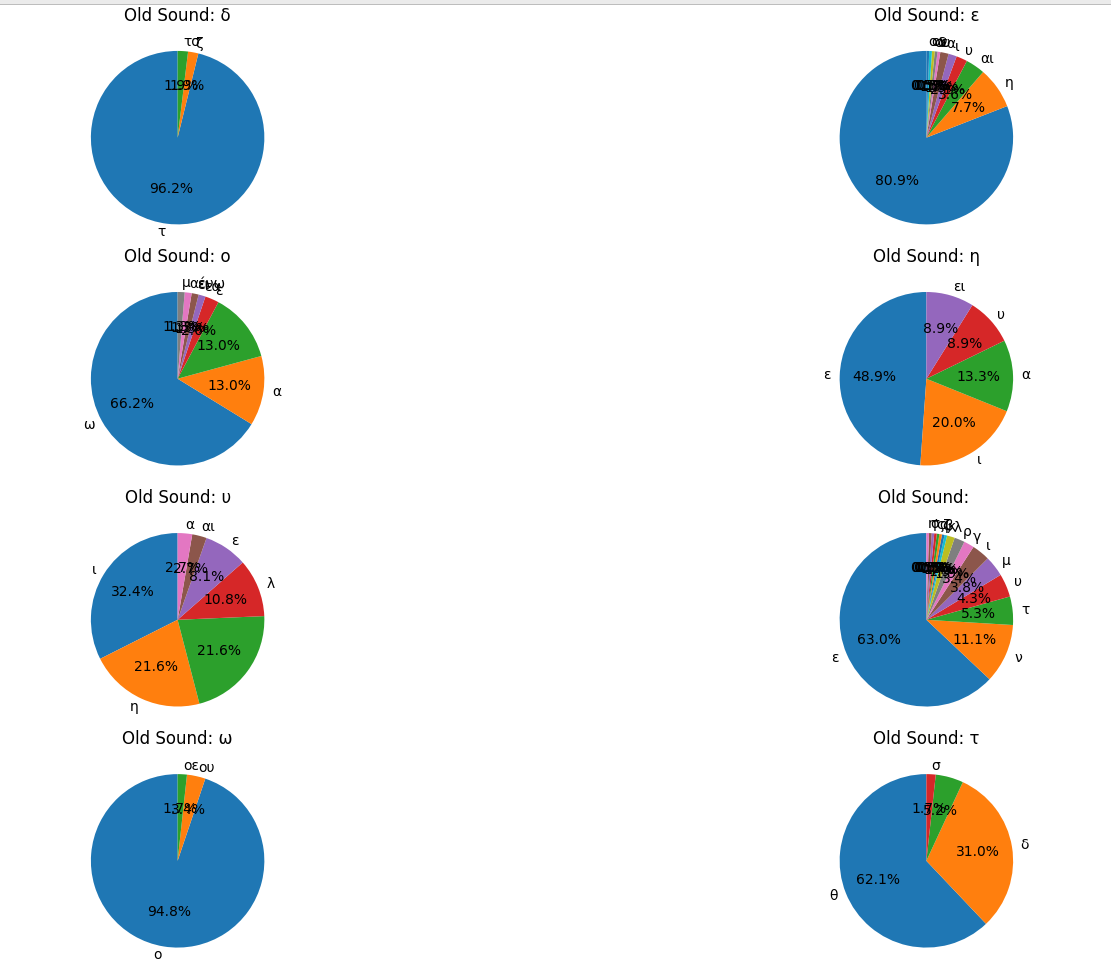

# Transition

Quelles sont les colonnes du df ? Eliminez toutes celles qui vous paraissent inutiles et sauvez cela dans un fichier nommé "clean_papyrus-corpus.csv"
C'est ce fichier qui servira de base d'affichage du front de l'application que vous allez construire

# III) Présenter le corpus /4

L'objectif de cette partie est de vous familiariser avec Streamlit https://streamlit.io/
Une librairie très intuitive pour construire en peu de lignes de codes une pseudo page web.

Lisez la documentation et les tutoriels  pour pouvoir suivre les consignes et construire l'application https://streamlit.io/components

L'ensemble de l'application doit être stockée dans un fichier unique nommé streamlit_papyrus.py et pouvoir tourner sans erreur au lancement de la commande
"streamlit run streamlit_papyrus.py"

0.3877551020408163
0.52


# 9) Création de l'application présentant les papyrus

En utilisant les composants streamlit adaptés, créez:

* Sur la page principal, le titre de l'application ("La Chasse aux Papyrus"), une image de votre choix, ainsi qu'une description de l'application
* Dans la barre à gauche, créez un menu déroulant permettant de choisir un papyrus parmi tous ceux de la collection
* Si un papyrus est sélectionné, les informations principales le concernant sont affichées sur la page centrale
(numéro dans la collection en haut centré
, Date, Provenance, Personnes, Lieux et Textual Irregularities (utilisez le système de colones et composants pour les présenter sous la forme clé / valeur)
* Il y a vraiment beaucoup de papyri à choisir ! Pour simplifier la sélection, donnez l'option de mettre des filtres sur la provenance et  la date de découverte (selectbox pour le lieu, slider pour la date) dont la manipulation va limiter le nombre de papyrus potentiellement sélectionnable

# 10) enrichissement des données

Le but est d'approfondir sa connaissance de streamlit
* Faites en sorte que quand on clique sur un nom de lieu ou de personne on fasse apparaître la liste des papyri dans lesquels il apparaît
* Faites apparaître les corrections de la colonne Text Irregularities dans le texte sous forme d'annotation textuelle streamlit

*Ajoutez une fonctionnalité supplémentaire à l'application.
* Expliquez son intêrét et comment vous l'avez codé




# BONUS HARDCORE (/2 points) :

Affichez les lieux mentionnés dans les papyri sur une carte